# Практическая работа №1: Основы анализа и моделирования социальных сетей
Выполнила студенка гр. 0383 Куртова Карина. Вариант №8

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей.

## Основные теоретические положения
**Социоматрица** -- матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети.

**Алгоритм Фрюхтермана-Рейнгольда** -- силовой алгоритм укладки графа (т. е. итеративный алгоритм, основанный на уменьшении общей энергии сети, где энергия может быть определена различными способами), в котором вершины определяются как некие тела, оказывающие друг на друга силы притяжения и отталкивания.

**Алгоритм Камада-Кавай** -- силовой алгоритм укладки графа, в котором вершины определяются как тела системы, а рёбра -- как пружины. Пружинная система настраивается таким образом, чтобы минимизация энергии системы соответствовала минимизации разницы между геометрическими и графовыми расстояниями.

**Размер сети** -- количество акторов сети.

**Плотность сети** -- доля имеющихся связей по отношению к макисмально возможному количеству связей.

Для ориентированных сетей: $\Delta = \displaystyle{\frac{L}{A_g^2}}$

Для неориентированных сетей: $\Delta = \displaystyle{\frac{L}{C^2_g}}$

**Компонента** -- подгруппа, в котором все акторы связаны друг с другом прямо или косвенно.

**Диаметр полной сети** -- наибольшая длина любого из кратчайших путей между всеми парами узлов.

**Коэффициент кластеризации** --  мера степени, в которой узлы графа стремятся сгруппироваться вместе.

**Степень узла** -- число рёбер, инцидентных узлу $n_i$.

Средняя степень узлов: $\overline{d} = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} d(n_i)$

Дисперсия степени узлов: $S^2_D = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left(d(n_i) - \overline{d}\right)^2$

**Центральность по степени** -- степень каждого актора.

Нормированная центральность по степени: $C'_D (n_i) = \displaystyle{\frac{d(n_i)}{g-1}}$

**Центральность по близости** -- более важными узлами считаются узлы, наиболее близкие к остальным узлам сети.

Нормированная центральность по близости: $C'_C (n_i) = \displaystyle{\frac{g - 1}{\sum^g_{j = 1} d(n_i, n_j)}}$

**Центральность по последовательности** -- характеризует, насколько важную роль данный узел играет на пути "между" парами других узлов сети, в том смысле, что пути между другими узлами должны проходить через данный узел.

Нормированная центральность по посредничеству: $C'_B = \displaystyle{\frac{C_b (n_i)}{C_{g-1}^2}}$

**Центральность по информации** -- обобщение понятия центральности по посредничеству, в котором все пути, между акторами с весами зависят от их длин, учитываются при подсчёте промежуточности.

**Централизация по степени:** $C_D = \displaystyle{\frac{\sum_{i = 1}^g (C'_D (n^*) - C'_D (n_i))}{(g-1)(g-2)}}$

**Централизация по близости**: $C_C = \displaystyle{\frac{\sum_{i = 1}^g (C'_C (n^*) - C'_C (n_i))}{(g-1)(g-2)/(2g - 3)}}$

**Централизация по посредничеству**: $C_B = \displaystyle{\frac{\sum_{i = 1}^g (C'_B (n^*) - C'_B (n_i))}{(g-1)}}$

**Централизация по информации** как дисперсия индексов инф. актора: $S_I^2 = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left( C'_I (n_i) - \overline{C_I} \right) ^2$

**Точка сочленения** -- узел, при удалении которого увеличивается число компонент связности.

**Мост** -- ребро, при удалении которого одна компонента разделяется на две.

**Престиж** -- мера, характеризующая актора с большим количеством входящих связей.

**Престиж по степени** -- входящая степень каждого узла: $P_D (n_i) = d_I (n_i) = x_{+i}$

Нормированный престиж по степени: $P'_D (n_i) = \displaystyle{\frac{x_{+i}}{g - 1}}$

**Престиж по близости** -- определяет, насколько все акторы близки к заданному по расстоянию до него.

$P_p (n_i) = \displaystyle{\frac{\# I_i / (g-1)}{\sum_{j: n_j \in I_i} \left( d(n_j, n_i) / \# I_i\right)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Перед началом работы необходимо подключить следующие библиотеки:

In [ ]:
library(igraph)
library(statnet)

**Задание 1.** Из файла florentine_marital.csv извлечём социоматрицу и выведем её на экран.

In [2]:
sm_dataframe <- read.table("florentine_marital.csv", header = TRUE, sep = ',')
sm <- data.matrix(sm_dataframe)
net <- network(sm, matrix.type = "adjacency")
sm

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Задание 2.** Преобразуем социоматрицу в список рёбер и выведем первые 5 элементов этого списка.

In [3]:
g <- graph.adjacency(sm)
edge_list <- as_edgelist(g)
head(edge_list, 5)

Acciaiuoli,Medici
Albizzi,Ginori
Albizzi,Guadagni
Albizzi,Medici
Barbadori,Castellani


**Задание 3.** Присвоим имена столбцам и строкам социоматрицы.

In [4]:
rownames(sm) <- colnames(sm_dataframe)
colnames(sm) <- colnames(sm_dataframe)
sm

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
Castellani,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
Ginori,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Guadagni,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
Lamberteschi,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Medici,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1
Pazzi,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Задание 4.** По полученной социоматрице построим ненаправленную сеть. 

In [5]:
g <- graph.adjacency(sm, mode = "undirected")
#Передаётся матрица смежности (социоматрица) sm, задаётся режим создания графа -- ненаправленный (undirected)
g

IGRAPH e15ee90 UN-- 16 20 -- 
+ attr: name (v/c)
+ edges from e15ee90 (vertex names):
 [1] Acciaiuoli--Medici       Albizzi   --Ginori       Albizzi   --Guadagni    
 [4] Albizzi   --Medici       Barbadori --Castellani   Barbadori --Medici      
 [7] Bischeri  --Guadagni     Bischeri  --Peruzzi      Bischeri  --Strozzi     
[10] Castellani--Peruzzi      Castellani--Strozzi      Guadagni  --Lamberteschi
[13] Guadagni  --Tornabuoni   Medici    --Ridolfi      Medici    --Salviati    
[16] Medici    --Tornabuoni   Pazzi     --Salviati     Peruzzi   --Strozzi     
[19] Ridolfi   --Strozzi      Ridolfi   --Tornabuoni  

**Задание 5.** Отобразим сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда:

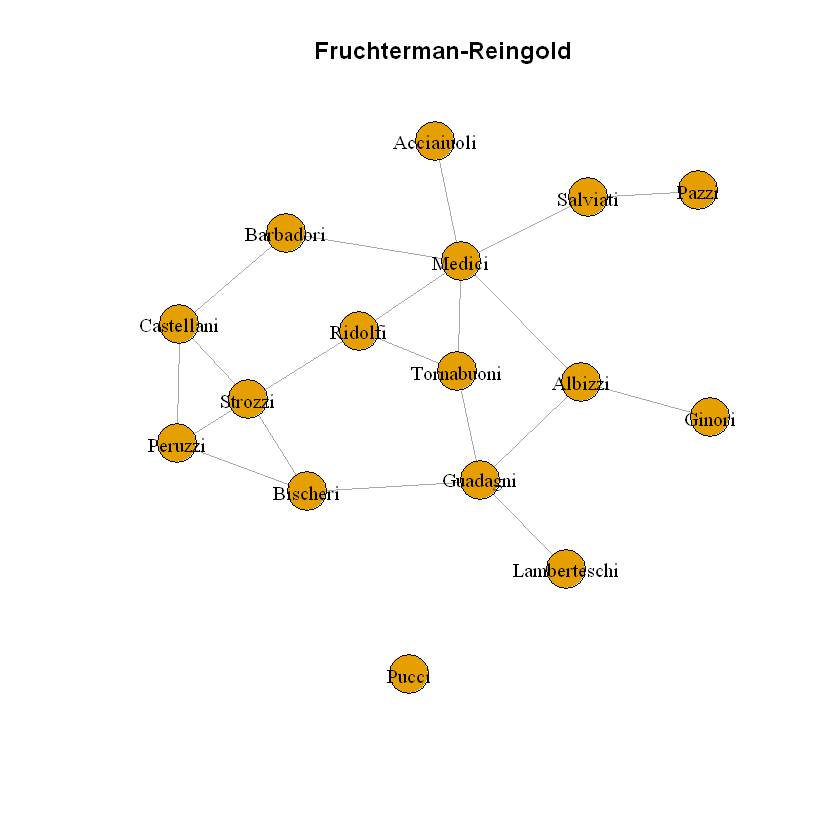

In [6]:
 E(g)$arrow.mode="-" #Так как граф ненаправленный

plot(g, layout = layout.fruchterman.reingold, 
     vertex.label = V(g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     vertex.label.color = "black",
     main = "Fruchterman-Reingold")

Теперь отобразим сеть с помощью алгоритма укладки Камада-Каваи:

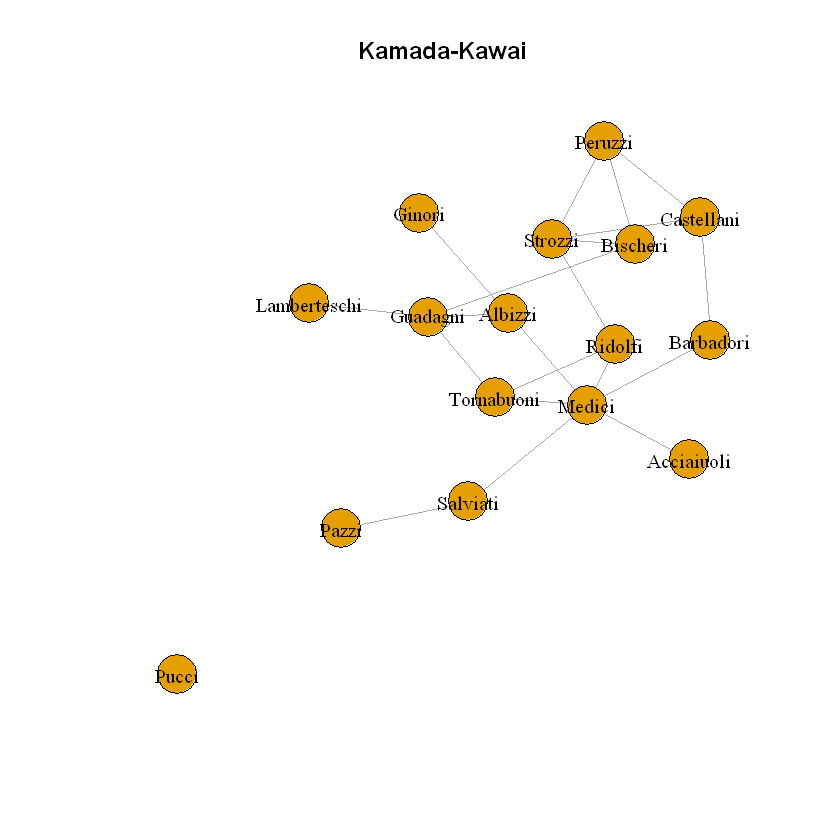

In [7]:
plot(g, layout = layout.kamada.kawai, 
     vertex.label = V(g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     vertex.label.color = "black",
     main = "Kamada-Kawai")

Алгоритм Фрюхтермана–Рейнгольда рассчитывает силы притяжения и отталкивания каждой вершины графа, и руководствуется только ими; алгоритм Камада-Каваи на каждом шаге отталкивается от вершины, на которую действует наибольшая сила, и минимизирует энергию относительно неё.

**Задание 6.** Выведем «описательную сводку» сети.

In [8]:
summary(net, print.adj = FALSE)

Network attributes:
  vertices = 16
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 40 
   missing edges = 0 
   non-missing edges = 40 
 density = 0.1666667 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

**Задание 7.** Выведем «пятичисловую сводку» сети:

    1) Размер сети;
    
    2) Плотность и с помощью соответствующей функции;
    
    3) Число компонент в сети по графику. Число компонент будет равно 2, так как есть одна изолированная вершина *Pucci*. Все остальные вершины образуют одну компоненту связности.
    
    4) Диаметр сети;
    
    5) Коэффициент кластеризации.
    
    

In [9]:
##Пятичисловая сводка
##Размер сети
cat("Размер сети: ", network.size(net), "\n")

##Плотность
dens <- gsize(g)/choose(gorder(g), 2)
cat("Плотность сети, посчитанная 'вручную': ", dens, "\n")
cat("Плотность сети с использованием библиотечной функции: ", gden(net), "\n")

##Компоненты
cat("Число компонент: ", components(net), "\n")

##Диаметр сети
cat("Диаметр сети: ", diameter(g), "\n")

##Коэффициент кластеризации
cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

Размер сети:  16 
Плотность сети, посчитанная 'вручную':  0.1666667 
Плотность сети с использованием библиотечной функции:  0.1666667 
Число компонент:  2 
Диаметр сети:  5 
Коэффициент кластеризации:  0.1914894 


Выводы:

    1) Всего в сети 16 семейств.
    
    2) Доля связей между семьями:  0.1666667

    3) Есть только 2 компоненты, в которых все акторы связаны друг с другом. В данном случае, второй компонентой будет изолированная вершина.
    
    4) Самый длинный из кратчайших путей связи между семьями равен 5.
    
    5) Доля триад в сети: 0.1914894 

**Задание 8.** Вычислим среднюю степень узлов и дисперсию.

In [10]:
##Средняя степень узлов
avg_deg <- sum(igraph::degree(g))/gorder(g)
avg_deg

##Дисперсия степени узлов
deg_variance <- sum((igraph::degree(g) - avg_deg)^2)/gorder(g)
deg_variance

[1] 2.5

[1] 2.125

В среднем каждое из семейств имеет ~2.5 связи с другими с мерой разброса, равной 2.125.

**Задание 9.** Заполним таблицу для различных мер центральности для неизолированных вершин.

In [11]:
##Удаление изолированных вершин из графа
g_cent <- delete_vertices(g, V(g)[igraph::degree(g) == 0])

##Нормированная центральность по степени
Cd <- igraph::degree(g_cent, normalized = T)

##Нормированная центральность по близости
Cc <- igraph::closeness(g_cent, normalized =  T)

##Нормированная центральность по посредничеству
Cb <- igraph::betweenness(g_cent, normalized = T)

##Нормированная центральность по информации
adj <-as_adjacency_matrix(g_cent)
adj <- as.matrix(adj)
cent_net <- network(adj, matrix.type = "adjacency")
Ci <- infocent(cent_net)
Ci <- Ci/sum(Ci)


df <- data.frame(ni = c(1:gorder(g_cent)), 
                 C_d = Cd,
                 C_c = Cc,
                 C_b = Cb,
                 C_i = Ci)
df

,ni,C_d,C_c,C_b,C_i
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Acciaiuoli,1,0.07142857,0.3684211,0.00000000,0.04943215
Albizzi,2,0.21428571,0.4827586,0.21245421,0.07408484
Barbadori,3,0.14285714,0.4375000,0.09340659,0.06816655
Bischeri,4,0.21428571,0.4000000,0.10439560,0.07427531
Castellani,5,0.21428571,0.3888889,0.05494505,0.07093098
Ginori,6,0.07142857,0.3333333,0.00000000,0.04309479
Guadagni,7,0.28571429,0.4666667,0.25457875,0.08190476
Lamberteschi,8,0.07142857,0.3255814,0.00000000,0.04562892
Medici,9,0.42857143,0.5600000,0.52197802,0.09502877


Как видно из таблицы, наибольшими значениями центральности обладает *Medici*, т. е. *Medici* является наиболее влиятельным актором в социальной сети.

**Задание 10.** Вычислим значения централизации для каждой меры.

In [12]:
##Централизация по степени
degree_cent <- centr_degree(g_cent)

##Централизация по близости
closeness_centr <- centr_clo(g_cent)

##Централизация по посредничеству
betw_centr <- centr_betw(g_cent)

##Централизация по информации
inf_centr <- (df$C_i - (sum(df$C_i)/gorder(g_cent)))^2
inf_centr<- sum(inf_centr)/gorder(g_cent)

df_c <- data.frame(Ctz_d = degree_cent$centralization,
                   Ctz_c = closeness_centr$centralization,
                   Ctz_b = betw_centr$centralization,
                   Ctz_i = inf_centr)
df_c

Ctz_d,Ctz_c,Ctz_b,Ctz_i
<dbl>,<dbl>,<dbl>,<dbl>
0.2380952,0.3224523,0.4368132,0.00027753


Вывод: Значение централизации по посредничеству наибольшее, по информации -- наименьшее. Это значит, что граф более всего "сплочён" около актора с наибольшим количеством связи (*Medici*) по посредничеству, менее сплочён -- по информации.

**Задание 11.** Выявим точки сочленения и мосты сети. Построим график сети, на котором выделены точки сочленения и мосты.

Попробуем выделить мосты и точки сочленения, пользуясь любым из представлений графа из пункта 5. Видим, что удаление вершины *Medici* приведёт к возникновению двух новых компонент связности, и рёбра от *Medici* до элементов этих компонент -- *Acciaiuoli* и *Salviati*, будут являться мостами; аналогично, удаление *Albizzi* добавит компоненту, состоящую из одной вершины *Ginori*, а удаление *Guadagni* даст компоненту, состоящую из одной вершины *Lamberteschi*. Тогда *Albizzi*, *Guadagni* -- точки сочленения, *Albizzi* - *Ginori*, *Guadagni* - *Lamberteschi* -- мосты.

Проверим данные утверждения с помощью функций пакета igraph:

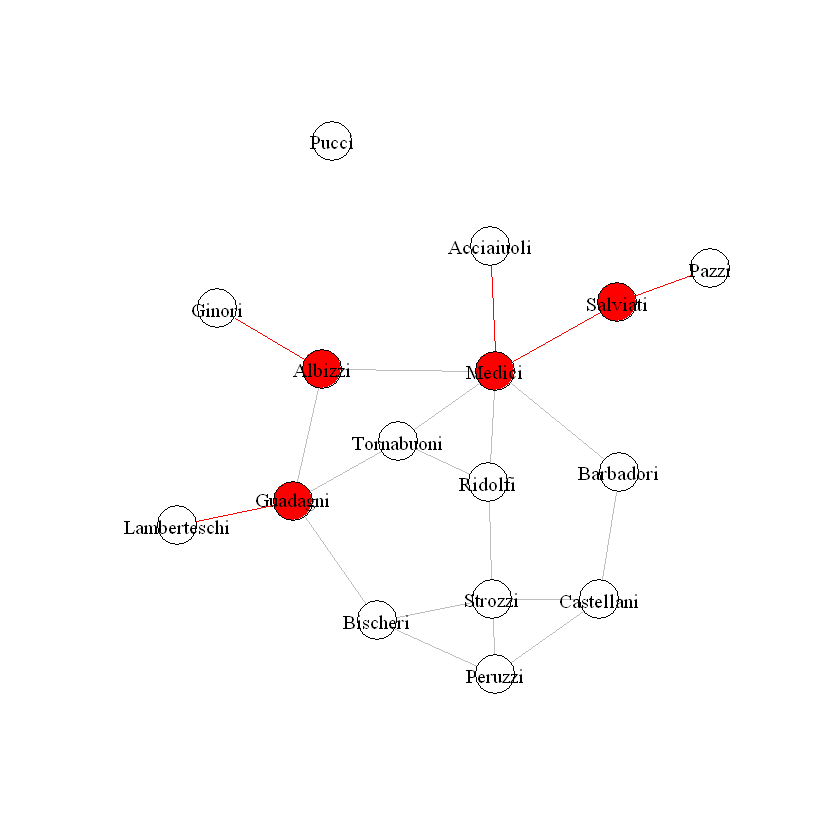

In [13]:
art_points <- igraph::articulation_points(g)
brg <- igraph::bridges(g)

V(g)$color <- "white"
E(g)$color <- "grey"
E(g)$color[brg] <- "red"
V(g)$color[art_points] <- "red"

plot(g, layout = layout.fruchterman.reingold, 
     vertex.label = V(g)$name,
     vertex.size = 15, 
     edge.arrow.size=.5,
     edge.arrow.color = "grey", 
     vertex.color= V(g)$color,
     vertex.label.color = "black", 
     edge.color = E(g)$color)

Видим, что предположения оказались верными.

**Задание 12.** Выполнить пп. 2–8 для направленной сети из файла krackhardt_friendship.csv.

In [14]:
#Получение матрицы смежности из файла
kf_dataframe <- read.table("krackhardt_friendship.csv", header = FALSE, sep = ',')
kf <- data.matrix(kf_dataframe)
kf

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,1,0,1,0,0,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,⋯,1,0,0,0,1,1,0,0,0,0
0,1,0,0,0,0,0,0,1,0,⋯,0,0,1,0,0,1,0,1,0,1
0,1,0,0,0,0,1,0,1,0,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,1,0,0,1,1,0,⋯,1,0,0,0,1,0,0,0,1,0


In [15]:
#Получение списка рёбер и вывод первых 5 
g_kf <- graph.adjacency(kf)
edge_list_kf <- as_edgelist(g_kf)
head(edge_list_kf, 5)

V1,V2
V1,V4
V1,V8
V1,V12
V1,V16


In [16]:
#Переименование столбцов и строк матрицы
rownames(kf) <- colnames(kf_dataframe)
colnames(kf) <- colnames(kf_dataframe)

In [17]:
#Представление в виде ненаправленного графа
g_kf_undirected <- graph.adjacency(kf, mode = "undirected")

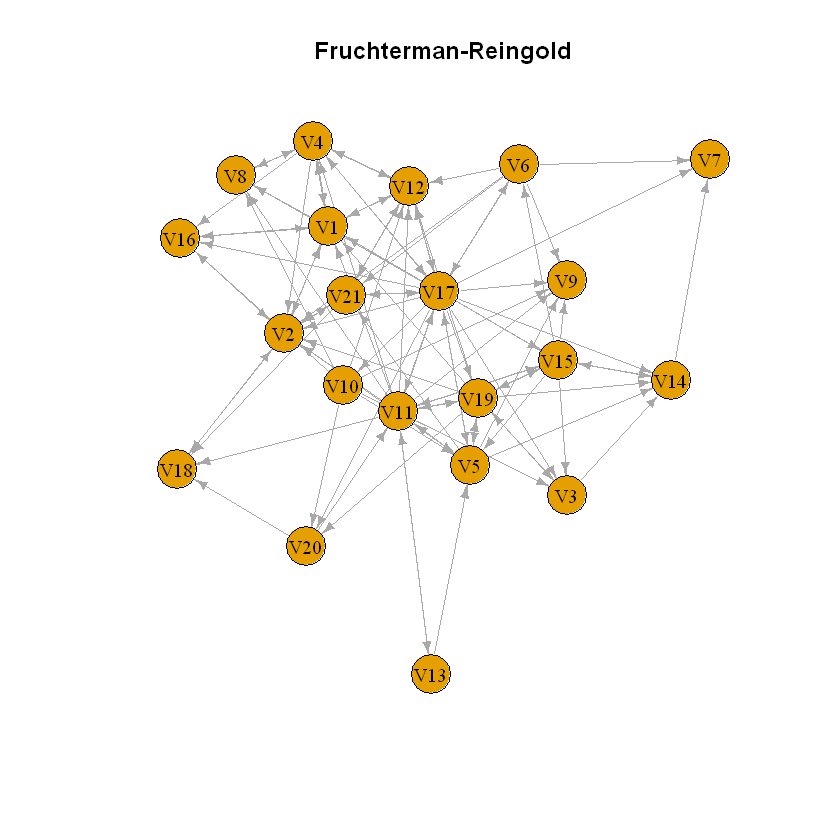

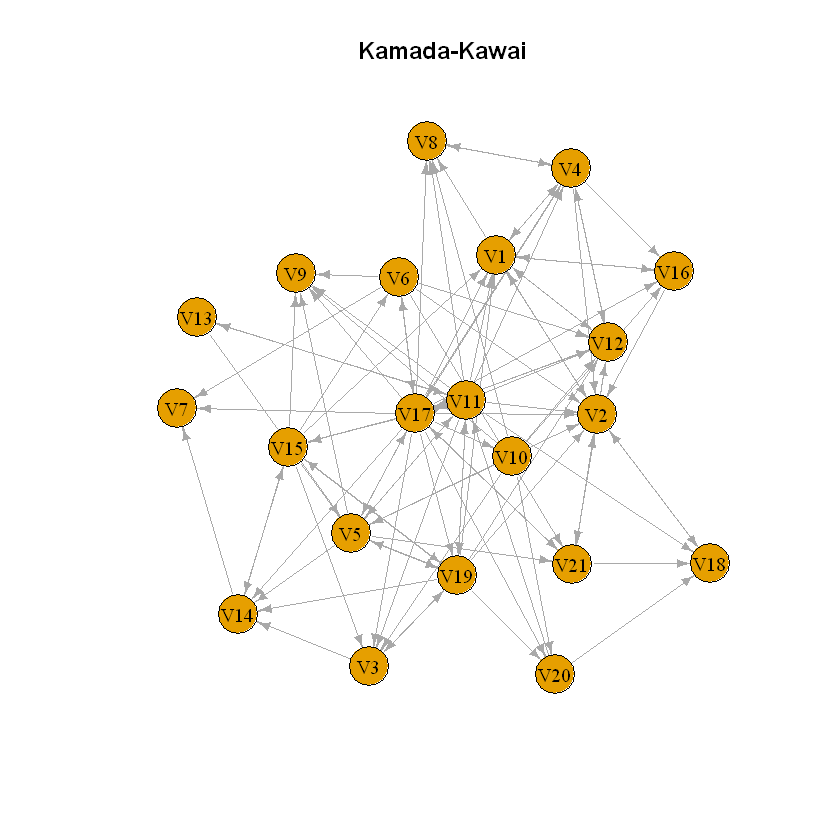

In [18]:
#Два способа отображения графа
kf_net <-  network(kf, matrix.type = "adjacency")
plot(g_kf, layout = layout.fruchterman.reingold, 
     vertex.label = V(g_kf)$name,
     vertex.size = 15, 
     edge.arrow.size =.5,
     vertex.label.color = "black",
     main = "Fruchterman-Reingold")

plot(g_kf, layout = layout.kamada.kawai, 
     vertex.label = V(g_kf)$name,
     vertex.size = 15, 
     edge.arrow.size =.5,
     vertex.label.color = "black",
     main = "Kamada-Kawai")

In [19]:
#Общая сводка
summary(kf_net, print.adj = FALSE)

Network attributes:
  vertices = 21
  directed = TRUE
  hyper = FALSE
  loops = FALSE
  multiple = FALSE
  bipartite = FALSE
 total edges = 102 
   missing edges = 0 
   non-missing edges = 102 
 density = 0.2428571 

Vertex attributes:
  vertex.names:
   character valued attribute
   21 valid vertex names

No edge attributes

In [20]:
##Пятичисловая сводка
##Размер сети
cat("Размер сети: ", network.size(kf_net), "\n")

##Плотность
dens <- gsize(g_kf)/(factorial(gorder(g_kf))/factorial(gorder(g_kf)-2)) #Используем формулу для ориентированных сетей
cat("Плотность сети, посчитанная 'вручную': ", dens, "\n")
cat("Плотность сети с использованием библиотечной функции: ", gden(kf_net), "\n")

##Компоненты
cat("Число компонент: ", components(kf_net), "\n")

##Диаметр сети
cat("Диаметр сети: ", diameter(g_kf), "\n")

##Коэффициент кластеризации
cat("Коэффициент кластеризации: ", gtrans(kf_net, mode = "graph"), "\n")

Размер сети:  21 
Плотность сети, посчитанная 'вручную':  0.2428571 
Плотность сети с использованием библиотечной функции:  0.2428571 
Число компонент:  3 
Диаметр сети:  5 
Коэффициент кластеризации:  0.4610526 


Выводы:

    1) Всего в сети 21 менеджер.
    
    2) Доля дружественных связей между менеджерами, т. е. вероятность того, что два случайно взятых менеджера дружат друг с другом:  0.2428571 

    3) Есть только 3 компоненты, в которых все акторы связаны друг с другом.
    
    4) Самый длинный из кратчайших путей связи между менеджерами равен 5.
    
    5) Доля триад в сети: 0.4610526

In [21]:
##Средняя степень входящих узлов
avg_deg_in <- igraph::degree(g_kf, mode = "in")
cat("Средняя степень входящих узлов: ", mean(avg_deg_in), "\n")

##Средняя степень исходящих узлов
avg_deg_out <- igraph::degree(g_kf, mode = "out")
cat("Средняя степень исходящих узлов: ",  mean(avg_deg_out), "\n")

##Дисперсия степени входящих узлов
deg_variance_in <- var(avg_deg_in)
cat("Дисперсия степени входящих узлов: ", deg_variance_in, "\n")

##Дисперсия степени исходящих узлов
deg_variance_out <- var(avg_deg_out)
cat("Дисперсия степени исходящих узлов: ", deg_variance_out, "\n")

Средняя степень входящих узлов:  4.857143 
Средняя степень исходящих узлов:  4.857143 
Дисперсия степени входящих узлов:  4.928571 
Дисперсия степени исходящих узлов:  20.02857 


Вывод: дисперсия степени входящих узлов больше дисперсии степени исходящих узлов, а значит, что число входящих степеней имеет меньший разброс в количестве, чем число степени исходящих узлов.

**Задание 13.** Заполним таблицу для различных мер престижа.

In [22]:
##Престиж по степени
deg_prestige <- prestige(kf_net, cmode = "indegree")
deg_prestige <- deg_prestige/(gorder(g_kf) - 1)

##Престиж по информации
#Находим геодезические расстояния
geo <- geodist(kf_net)$gdist
colnames(geo) <- colnames(kf)

#Удаляем все строки, обозначающие вершины без исходящих связей, т. е. имеющие значение Inf
geo <- geo[!is.infinite(rowSums(geo)), ]

I_i <- nrow(geo)
clos_prestige <- (I_i/(gorder(g_kf) - 1))/(colSums(geo)/I_i)

prestige_df <- data.frame(Pd = deg_prestige,
                          Pp = clos_prestige)
prestige_df

,Pd,Pp
,<dbl>,<dbl>
V1,0.40,0.6446429
V2,0.50,0.6685185
V3,0.25,0.4750000
V4,0.25,0.5308824
V5,0.30,0.4878378
V6,0.10,0.4011111
V7,0.15,0.4011111
V8,0.25,0.5308824
V9,0.30,0.4512500


Наибольшим числом входящих связей характеризуется V2, что видно из значений престижа для данного актора. Другими словами, больше всего менеджеров дружит со вторым менеджером.

## Выводы

В ходе данной работы были получены навыки работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей, в частности: построены социальные сети, которые были визуализированы с помошью двух разных алгоритмов укладки и изучены основные характеристики этих сетей с использованием раздичных встроенных и библиотечных функций. В работе были использованы библиотеки для языка R: igraph, statnet.  

В ходе работы были встречены некоторые трудности, связанные, в основном, с подключёнными библиотеками и их функциями. Во-первых, обе библиотеки имеют функции с одинаковыми названиями (например, *degree*), из-за чего возникали ошибки компиляции. Проблема была решена путём явного указания области имён использованных функций. Во-вторых, обе библиотеки работают с разными типами представления графа -- для statnet это network, для igraph -- graph, поэтому одна и та же сеть хранится в двух типах. В-третьих, не для всех параметров сети есть реализованные функции (например, централизация по информации или престиж по информации), поэтому эти функции реализованы с использованием базовых функций языка R.  